
# <span style="color:rgb(213,80,0)">Symmetries in closed and open quantum systems</span>
<a name="beginToc"></a>

## Table of Contents
&emsp;[Symmetries in Hamiltonian Systems](#symmetries-in-hamiltonian-systems)

&emsp;&emsp;[Example: Jaynes\-Cummings Model](#example-jaynes-cummings-model)

&emsp;[Exercise](#exercise)

<a name="endToc"></a>

## Symmetries in Hamiltonian Systems

In quantum systems, a **symmetry** corresponds to a transformation under which the system remains invariant. If the Hamiltonian $\hat{H}$ commutes with a symmetry operator $\hat{S}$ :


$$[\hat{H} ,\hat{S} ]=0$$

then the observable associated with $\hat{S}$ is conserved over time. According to **Noether's theorem**, symmetries lead to conservation laws. For example, $U(1)$ symmetry often corresponds to the conservation of particle number or charge.

### Example: Jaynes\-Cummings Model

The **Jaynes\-Cummings model** describes the interaction between a two\-level atom and a single quantized electromagnetic field mode. Its Hamiltonian is:


$${\hat{H} }_{JC} =\hbar \omega {\hat{a} }^{\dagger} \hat{a} +\frac{\hbar \omega_0 }{2}{\hat{\sigma} }_z +\hbar g({\hat{a} }^{\dagger} {\hat{\sigma} }_- +\hat{a} {\hat{\sigma} }_+ )$$

Here, ${\hat{a} }^{\dagger}$ and $\hat{a}$ are the creation/annihilation operators for the field, and ${\hat{\sigma} }_z ,{\hat{\sigma} }_{\pm }$ are Pauli operators for the atom.


This model has $U(1)$ symmetry, meaning the total number of excitations:


$$\hat{N} ={\hat{a} }^{\dagger} \hat{a} +{\hat{\sigma} }_+ {\hat{\sigma} }_-$$

is conserved, as:


$$[{\hat{H} }_{JC} ,\hat{N} ]=0$$

Thus, the total number of particles (photons + atomic excitations) is constant.


In [1]:
% Initizalize
initTasks;  % Octave compatibility
magicLaTeX; % Nice plots
% Define QuantumToolbox- and QuTiP-like "destroy", "sigma{m,p,z}", and
% "commutator"
destroy = @(Nc) spdiags(sqrt(0:(Nc-1)).',1,Nc,Nc);
sigmam = @() destroy(2)'; % |e> is the first element, and |g> the second
sigmap = @() destroy(2);
sigmaz = @() spdiags([1,-1].',0,2,2);
commutator = @(a,b) a*b - b*a;
tracenorm = @(a) norm(svd(full(a)),1);

In [2]:
N = 10; % cutoff for the Fock space of the cavity

a = kron(destroy(N), speye(2)); % cavity annihilation operator

sm = kron(speye(N), sigmam()); % atomic lowering operator
sp = kron(speye(N), sigmap()); % atomic raising operator
sz = kron(speye(N), sigmaz()); % atomic z operator

H = @(wc, wq, g) wc * (a' * a) + wq * sz / 2 + g * (a' * sm + a * sp);


Let's define the operator $\hat{\Pi} =\exp \left(i\pi \hat{N} \right)$ , and let's calculate the commutator $[{\hat{H} }_{JC} ,\hat{\Pi} ]$ to verify that the Hamiltonian commutes with the parity operator.


In [3]:
wc = 1;
wq = 1;
g = 0.01

g = 0.0100


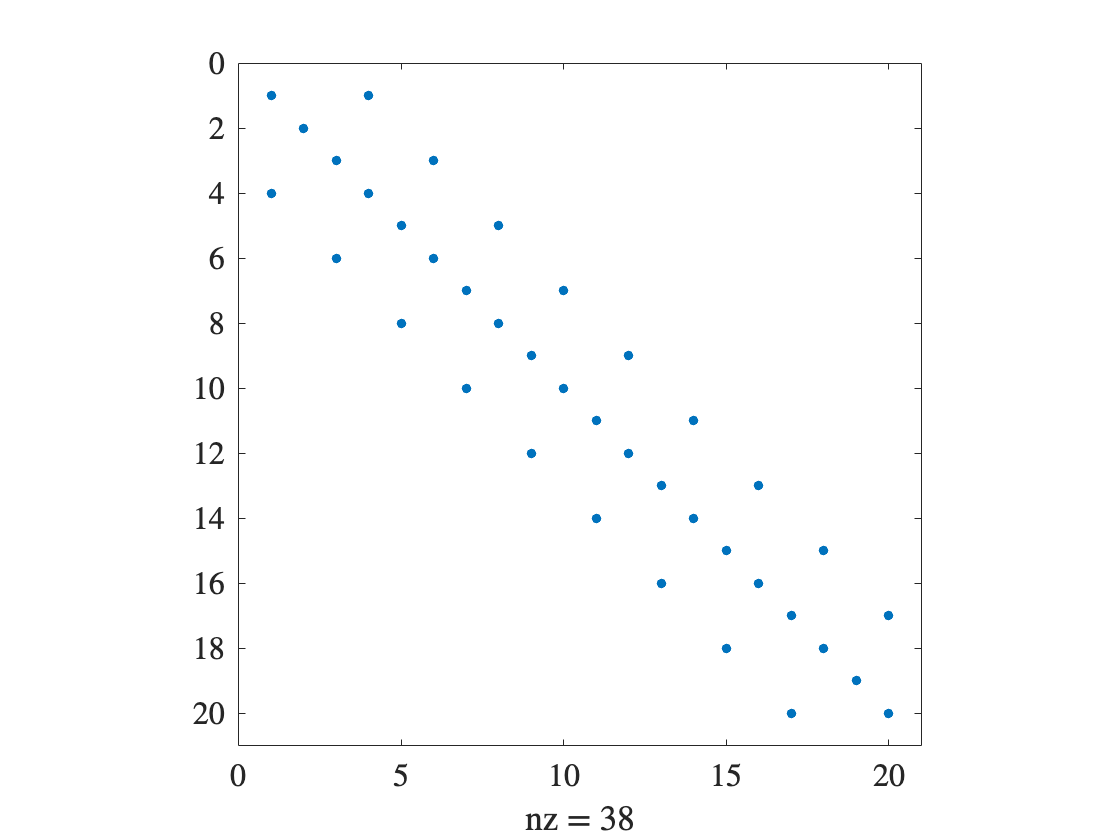

In [4]:
P = expm(1i * pi * ((a' * a) + sp * sm));
H_JC = H(wc, wq, g);
spy(H_JC);

In [5]:
tracenorm(commutator(H_JC,P))

ans = 1.9556e-15


Was is just a coincidence? Let's try calculate it for different values of $\theta$ .


In [6]:
P_t = @(t) expm(1i * t * ((a' * a) + sp * sm));

t_list = linspace(0, 2*pi, 101); % 101 elements from 0 to 2π, in order to include also π
norm_list = arrayfun(@(t) tracenorm(commutator(H_JC, P_t(t))), t_list);

disp(string(all(abs(norm_list)<1e-10)))

true


Let's try with the Quantum Rabi Model now



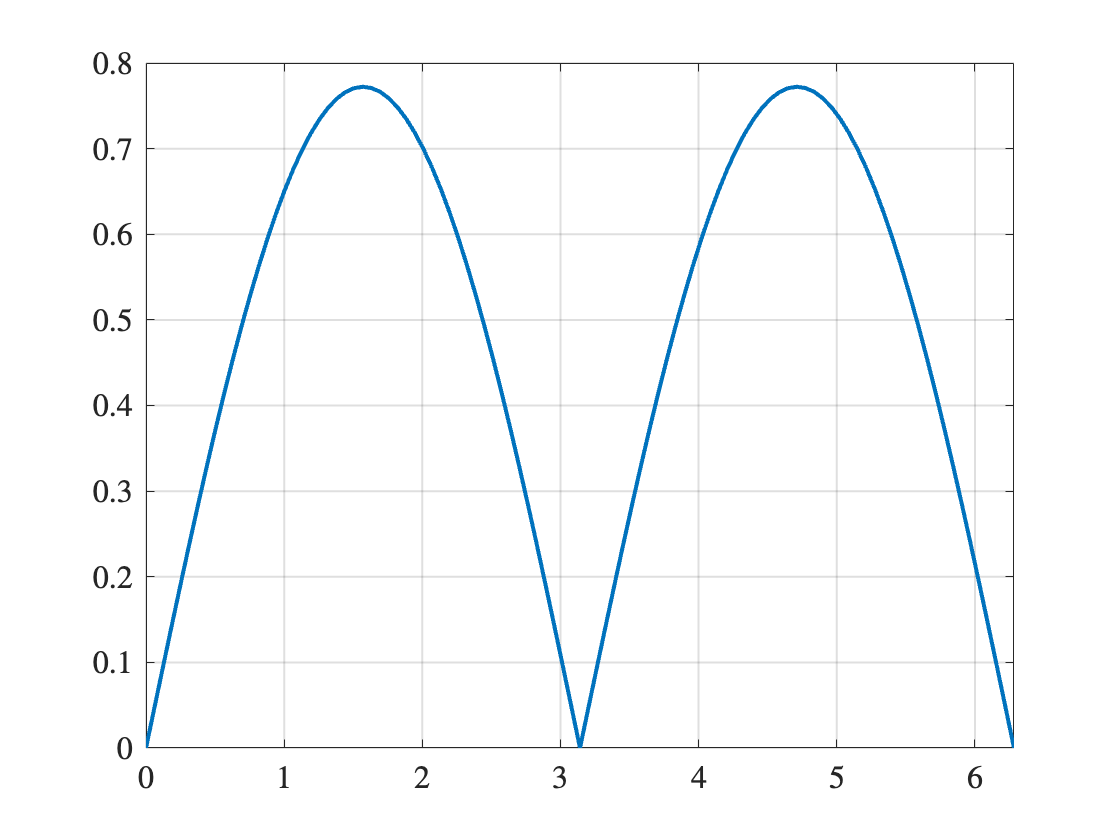

In [7]:
H_QRM = wc * (a' * a) + wq * sz / 2 + g * (a + a') * (sm + sp);

norm_list = arrayfun(@(t) tracenorm(commutator(H_QRM, P_t(t))), t_list);

figure;
plot(t_list, norm_list);
grid on;
xlim([0, 2*pi]);


As can be seen, the parity is conserved only for discrete values of $\theta$ : $\theta =0,\pi$ .

## Exercise

We now know that there is a symmetry in our system, and that we can block\-diagonalize the Hamiltonian. In the JC model, each block corresponds to a different number of excitations. In the Rabi model, the blocks correspond to different values of the parity: even and odd.


Find a way to block\-diagonalize the Hamiltonian.


**Hint:** Choose a starting vector (e.g., $|\Psi_0 \rangle =|0,e\rangle$ ) and check all the connected vectors through the Hamiltonian such that $\langle \Psi_i |\hat{H} |\Psi_0 \rangle \not= 0$ . These vectors will form a block. Repeat the process for the remaining vectors.

